In [1]:
!pip install qiskit

In [2]:
import numpy as np
from qiskit import QuantumRegister
from qiskit.quantum_info import Statevector as sv, Operator as opr
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

In [3]:
M1 = np.array([[1,1],[1,0]])
M2 = np.array([[1,0],[1,1]])
M3 = np.matmul(M1,M2)
M3

array([[2, 1],
       [1, 0]])

In [4]:
u = sv([1/np.sqrt(2), 1/np.sqrt(2)])
v = sv([(1+2.0j)/3, -2.0/3])
w = sv([1/3, 2/3])

In [5]:
display(u.draw("text"))
display(v.draw("latex"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

In [6]:
print(w.is_valid())

False


In [7]:
#measuring the qubit
w.measure()
#mesuring the invlid qubit gives error

ValueError: probabilities do not sum to 1

In [17]:
print(u.measure())
print(u.measure())
#measurement may be different as they are probabilistic

('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))
('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))


{'0': 545, '1': 455}

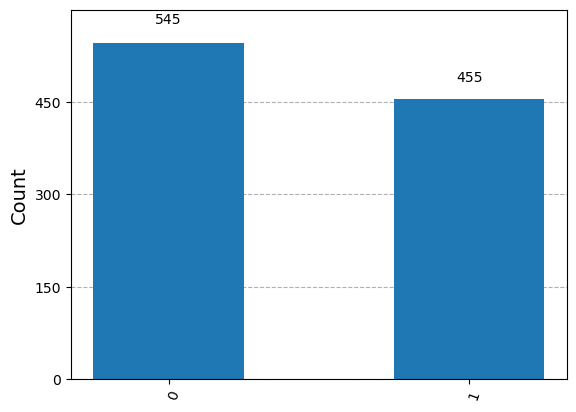

In [19]:
#displaying count after certain trials
stats = v.sample_counts(1000)
display(stats)
plot_histogram(stats)

In [20]:
#applying operator on statevector
#like applying X gate of pauli x phase
X = opr([[0,1],[1,0]])
display(X.draw("latex"))
display(v.draw("latex"))
y = v.evolve(X)
display(y.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
#applying Z gate
Z = opr([[1,0],[0,-1]])
display(Z.draw("latex"))
display(v.draw("latex"))
v2 = v.evolve(Z)
display(v2.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
#we can make a simple quatum circuit with composition of few gates
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.h(0)
circuit.t(0)
circuit.s(0)
display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
q: ┤ X ├┤ H ├┤ T ├┤ S ├
   └───┘└───┘└───┘└───┘

In [23]:
#running the circuit for some input
ket0 = sv([1,0])
op = ket0.evolve(circuit)
display(op.draw("latex"))

<IPython.core.display.Latex object>

In [3]:
help(QuantumRegister)

Help on class QuantumRegister in module qiskit.circuit.quantumregister:

class QuantumRegister(qiskit.circuit.register.Register)
 |  QuantumRegister(size: 'int | None' = None, name: 'str | None' = None, bits=None)
 |  
 |  Implement a quantum register.
 |  
 |  Method resolution order:
 |      QuantumRegister
 |      qiskit.circuit.register.Register
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  bit_type = <class 'qiskit.circuit.quantumregister.Qubit'>
 |      Implement a quantum bit.
 |  
 |  
 |  instances_counter = count(0)
 |  
 |  prefix = 'q'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from qiskit.circuit.register.Register:
 